## BFS capstone project

The requirements of this project is to build predictive models to assess factors affecting credit risk using provided past data . This includes past customer demographic data and credit bureau data.

The performace tag variable is the indicator for default (1: default)

Two types of models need to be built 
1) using demographic data alone . (to understand the predictive power of application data)
2) using both sets of data

The following steps will be 
- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

### Data Understanding

Importing the requisite libraries and apply univariate and multivariate analysis.

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

demographic = pd.read_csv("Demographic data.csv", sep=",")
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 5.2+ MB


In [52]:
#demographic

CreditBureau = pd.read_csv("Credit Bureau data.csv", sep=",")
CreditBureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [53]:
#demographic
#CreditBureau

demographic.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [54]:
CreditBureau.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

We can note that both datasets have 71295 data entries.

checking for duplicates in both files

In [55]:

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = demographic[demographic.duplicated()]

In [56]:
duplicateRowsDF.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag


In [57]:

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = CreditBureau[CreditBureau.duplicated()]

In [58]:
duplicateRowsDF.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag


In [59]:
#No duplicate rows in both files 

In [60]:
#Compare application id in the two files

l = np.where(demographic['Application ID'] == CreditBureau['Application ID'], '0', '1')
print (l)



['0' '0' '0' ... '0' '0' '0']


In [61]:

i=0


for element in l:
        if (element != '0'):
            i= i+1
print (i)            

0


In [62]:
#Compare performance tag in the two files

l = np.where(demographic['Performance Tag'] == CreditBureau['Performance Tag'], '0', '1')
print (l)



['0' '0' '0' ... '0' '0' '0']


In [63]:

i=0


for element in l:
        if (element != '0'):
            i= i+1
print (i)  

#Corresponding to 1425 blank performace tags.
# i.e. .02% of data dropiing them from both files

1425


In [64]:
#demographic = demographic[pd.notnull(demographic['Performance Tag'])]


In [65]:
#CreditBureau = CreditBureau[pd.notnull(CreditBureau['Performance Tag'])]

In [66]:
#Compare performance tag in the two files

l = np.where(demographic['Performance Tag'] == CreditBureau['Performance Tag'], '0', '1')
print (l)



['0' '0' '0' ... '0' '0' '0']


In [67]:

i=0


for element in l:
        if (element != '0'):
            i= i+1
print (i)  



1425


In [68]:
demographic['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

In [69]:
CreditBureau['Performance Tag'].value_counts()

0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64

In [70]:
CreditBureau.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [71]:
demographic.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [72]:
#renaming column names of both files for ease of use
#CreditBureau


df = pd.DataFrame(columns=list(CreditBureau.columns.values))

new_cols=['90DPD6','60DPD6', '30DPD6', '90DPD12', '60DPD12', '30DPD12',
         'CCUtil', 'tradeOpen6', 'tradeOpen12', 'PLtradeOpen6', 'PLtradeOpen12',
         'NoInq6', 'NoInq12', 'OpenHomeLoan', 'OutstandBalance', 'TotTrades',
         'OpenAutoLoan', 'Perf_Tag']
df.rename(columns=dict(zip(df.columns[1:], new_cols)),inplace=True)

df

,Application ID,90DPD6,60DPD6,30DPD6,90DPD12,60DPD12,30DPD12,CCUtil,tradeOpen6,tradeOpen12,PLtradeOpen6,PLtradeOpen12,NoInq6,NoInq12,OpenHomeLoan,OutstandBalance,TotTrades,OpenAutoLoan,Perf_Tag


In [73]:
CreditBureau.columns=df.columns

In [74]:
CreditBureau.columns.values

array(['Application ID', '90DPD6', '60DPD6', '30DPD6', '90DPD12',
       '60DPD12', '30DPD12', 'CCUtil', 'tradeOpen6', 'tradeOpen12',
       'PLtradeOpen6', 'PLtradeOpen12', 'NoInq6', 'NoInq12',
       'OpenHomeLoan', 'OutstandBalance', 'TotTrades', 'OpenAutoLoan',
       'Perf_Tag'], dtype=object)

In [75]:
#demographic


df = pd.DataFrame(columns=list(demographic.columns.values))

new_cols=['Mar_status','NoDependents']
df.rename(columns=dict(zip(df.columns[3:4], new_cols)),inplace=True)


new_cols=['Typ_residence','NoMonthsCurrResidence', 'NoMonthsCurrCompany', 'Perf_Tag']
df.rename(columns=dict(zip(df.columns[8:], new_cols)),inplace=True)
demographic.columns=df.columns
df

,Application ID,Age,Gender,Mar_status,No of dependents,Income,Education,Profession,Typ_residence,NoMonthsCurrResidence,NoMonthsCurrCompany,Perf_Tag


In [76]:
demographic.columns=df.columns

In [77]:
demographic.columns.values

array(['Application ID', 'Age', 'Gender', 'Mar_status',
       'No of dependents', 'Income', 'Education', 'Profession ',
       'Typ_residence', 'NoMonthsCurrResidence', 'NoMonthsCurrCompany',
       'Perf_Tag'], dtype=object)

In [78]:
#Create a merged file

final_merged = pd.merge(demographic,
                 CreditBureau,
                 on='Application ID')
final_merged.head()

,Application ID,Age,Gender,Mar_status,No of dependents,Income,Education,Profession,Typ_residence,NoMonthsCurrResidence,...,tradeOpen12,PLtradeOpen6,PLtradeOpen12,NoInq6,NoInq12,OpenHomeLoan,OutstandBalance,TotTrades,OpenAutoLoan,Perf_Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [79]:
final_merged.isnull().sum()

Application ID              0
Age                         0
Gender                      2
Mar_status                  6
No of dependents            3
Income                      0
Education                 119
Profession                 14
Typ_residence               8
NoMonthsCurrResidence       0
NoMonthsCurrCompany         0
Perf_Tag_x               1425
90DPD6                      0
60DPD6                      0
30DPD6                      0
90DPD12                     0
60DPD12                     0
30DPD12                     0
CCUtil                   1058
tradeOpen6                  1
tradeOpen12                 0
PLtradeOpen6                0
PLtradeOpen12               0
NoInq6                      0
NoInq12                     0
OpenHomeLoan              272
OutstandBalance           272
TotTrades                   0
OpenAutoLoan                0
Perf_Tag_y               1425
dtype: int64

In [80]:
# Looking at the two inputfiles separately.
#1) Credit bureau file. identify records whose avg credit card utilisation is blank and all other fields are 0s. 
#These represent records with no hit in credit bureau
#Creating a new field: to represnt no hit/ no other credit card from Credit bureau data
#0 - default value
#1 - no hit
#2 - no other credit card


    
def f (nintyDPD6,sixtyDPD6,thirtyDPD6,nintyDPD12,sixtyDPD12,thirtyDPD12,CCutil,tr6,tr12,PLtr6,PLtr12,inq6,
      inq12,openhomeloan,OutBal,TotTrades,openautoloan):

    if (np.isnan(CCutil)) :
        if (nintyDPD6 == 0 and sixtyDPD6 == 0 and thirtyDPD6 == 0 and
            nintyDPD12 == 0 and sixtyDPD12 == 0 and thirtyDPD12 == 0 
            and tr6 == 0 and tr12 == 0 and 
            PLtr6 == 0 and PLtr12 == 0 and inq6 == 0 and inq12 == 0 and 
            openhomeloan == 0 and OutBal == 0 and 
            TotTrades == 0 and openautoloan == 0):
        
           return 1 
        else:
            return 2
    else:
        return 0

#x = f(0,0,0,0,0,0,float('nan'),0,0,0,0,0,0,0,0,0,0)       
        
CreditBureau['hit_flag'] = CreditBureau.apply(lambda row:f(row['90DPD6'],row['60DPD6'], row['30DPD6'],
                                                           row['90DPD12'], row['60DPD12'], row['30DPD12'],
                                                           row['CCUtil'], row['tradeOpen6'], row['tradeOpen12'],
                                                           row['PLtradeOpen6'], row['PLtradeOpen12'], row['NoInq6'],
                                                           row['NoInq12'], row['OpenHomeLoan'], row['OutstandBalance'],
                                                           row['TotTrades'], row['OpenAutoLoan']),axis=1)
                                                          
                                            
    
CreditBureau.head()

,Application ID,90DPD6,60DPD6,30DPD6,90DPD12,60DPD12,30DPD12,CCUtil,tradeOpen6,tradeOpen12,PLtradeOpen6,PLtradeOpen12,NoInq6,NoInq12,OpenHomeLoan,OutstandBalance,TotTrades,OpenAutoLoan,Perf_Tag,hit_flag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0,0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0,0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0,0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0,0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0,0


In [81]:
#Replacing all blank values with 

#CreditBureau.loc[CreditBureau['hit_flag'] == 1]

In [82]:
CreditBureau['CCUtil'].value_counts()

8.0      3495
9.0      3490
7.0      3388
10.0     3222
113.0    3133
6.0      2978
11.0     2905
12.0     2571
5.0      2497
13.0     2235
4.0      1960
14.0     1812
3.0      1605
15.0     1508
16.0     1218
2.0      1080
17.0     1079
18.0      936
19.0      798
20.0      699
21.0      691
1.0       652
23.0      602
22.0      589
24.0      568
46.0      551
41.0      545
25.0      538
48.0      530
47.0      527
         ... 
82.0      134
84.0      134
86.0      128
85.0      118
87.0      109
88.0       96
90.0       92
93.0       85
89.0       82
92.0       76
91.0       75
98.0       58
95.0       55
103.0      54
94.0       52
96.0       52
104.0      45
106.0      45
102.0      44
108.0      43
100.0      43
101.0      42
105.0      42
112.0      41
107.0      39
97.0       38
99.0       36
111.0      36
109.0      33
110.0      30
Name: CCUtil, Length: 114, dtype: int64

In [83]:
##Filling blank values of Credit card utilisation as 0s (to be used in conjunction with hit flag)
#CreditBureau['CCUtil'] = CreditBureau['CCUtil'].fillna(0)

In [84]:
CreditBureau.isnull().sum()

Application ID        0
90DPD6                0
60DPD6                0
30DPD6                0
90DPD12               0
60DPD12               0
30DPD12               0
CCUtil             1058
tradeOpen6            1
tradeOpen12           0
PLtradeOpen6          0
PLtradeOpen12         0
NoInq6                0
NoInq12               0
OpenHomeLoan        272
OutstandBalance     272
TotTrades             0
OpenAutoLoan          0
Perf_Tag           1425
hit_flag              0
dtype: int64

compute WOE and IV

In [85]:
demographic.isnull().sum()

Application ID              0
Age                         0
Gender                      2
Mar_status                  6
No of dependents            3
Income                      0
Education                 119
Profession                 14
Typ_residence               8
NoMonthsCurrResidence       0
NoMonthsCurrCompany         0
Perf_Tag                 1425
dtype: int64

In [86]:
App_Id = demographic['Application ID']


In [87]:
demographic.drop('Application ID', axis=1, inplace=True)

In [88]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

iv, woe = iv_woe(data = demographic, target = 'Perf_Tag', bins=10, show_woe = True)
print(iv)
print(woe)

Information value of Age is 0.004168
  Variable          Cutoff     N  Events  % of Events  Non-Events  \
0      Age  (-3.001, 31.0]  7274   302.0     0.102442      6972.0   
1      Age    (31.0, 36.0]  7866   342.0     0.116011      7524.0   
2      Age    (36.0, 39.0]  7146   320.0     0.108548      6826.0   
3      Age    (39.0, 42.0]  7003   310.0     0.105156      6693.0   
4      Age    (42.0, 45.0]  6879   278.0     0.094301      6601.0   
5      Age    (45.0, 48.0]  6869   299.0     0.101425      6570.0   
6      Age    (48.0, 51.0]  6791   267.0     0.090570      6524.0   
7      Age    (51.0, 54.0]  6786   248.0     0.084125      6538.0   
8      Age    (54.0, 58.0]  6408   290.0     0.098372      6118.0   
9      Age    (58.0, 65.0]  6848   292.0     0.099050      6556.0   

   % of Non-Events       WoE        IV  
0         0.104181 -0.016830  0.000029  
1         0.112429  0.031358  0.000112  
2         0.101999  0.062228  0.000408  
3         0.100012  0.050156  0.000258 

Information Value	Predictive Power

1. < 0.02	useless for prediction
2. 0.02 to 0.1	Weak predictor
3. 0.1 to 0.3	Medium predictor
4. 0.3 to 0.5	Strong predictor
5. >0.5	Suspicious or too good to be true

-           Variable        IV
-                    Age  0.004168
-                 Gender  0.000320
-             Mar_status  0.000092-
-       No of dependents  0.002658
-                 Income  0.042251
-              Education  0.000766
-            Profession   0.002279
-          Typ_residence  0.000917
-  NoMonthsCurrResidence  0.066591

So variables with relevant predictive power:  Income and NoMonthsCurrResidence (which are weak predictors)

In [89]:
demographic.columns.values

array(['Age', 'Gender', 'Mar_status', 'No of dependents', 'Income',
       'Education', 'Profession ', 'Typ_residence',
       'NoMonthsCurrResidence', 'NoMonthsCurrCompany', 'Perf_Tag'],
      dtype=object)

In [90]:
#Exploratory data Analysis
#First extracting the records which have blank perf_tag to another file.
demographic_cleaned = demographic[~np.isnan(demographic.Perf_Tag)]

In [91]:
demographic_cleaned.shape

(69870, 11)

-Application ID              0
-Age                         0
-Gender                      2
-Mar_status                  6
-No of dependents            3
-Income                      0
-Education                 119
-Profession                 14
-Typ_residence               8
-NoMonthsCurrResidence       0
-NoMonthsCurrCompany         0
-Perf_Tag                 1425

In [97]:
#Taking care of other null values
# Gender
demographic['Gender'].value_counts(dropna=False)

M    54458
F    16837
Name: Gender, dtype: int64

In [96]:
#Majority of applicants are male, so convertinf the two Nan s to 'M'
demographic['Gender'].fillna('M', inplace=True)

In [98]:
#Mar_status
demographic['Mar_status'].value_counts(dropna=False)

Married    60730
Single     10559
NaN            6
Name: Mar_status, dtype: int64

In [99]:
#Majority of applicants are married, so converting the two Nan s to 'M'
demographic['Mar_status'].fillna('Married', inplace=True)

In [100]:
#No of dependents 
demographic['No of dependents'].value_counts(dropna=False)

 3.0    16279
 1.0    15387
 2.0    15289
 4.0    12222
 5.0    12115
NaN         3
Name: No of dependents, dtype: int64

In [104]:
#defaulting to value 3
demographic['No of dependents'].fillna(3.0, inplace=True)

In [113]:
#No of dependents 
demographic['Education'].value_counts(dropna=False)

Professional    24839
Masters         23970
Bachelor        17697
Phd              4549
Others            121
NaN               119
Name: Education, dtype: int64

In [108]:
#Extracting the 119 values to another DF for analysis

education_null = demographic[pd.isnull(demographic.Education)]

In [109]:
education_null.shape

(119, 11)

In [114]:
education_null.columns


Index(['Age', 'Gender', 'Mar_status', 'No of dependents', 'Income',
       'Education', 'Profession ', 'Typ_residence', 'NoMonthsCurrResidence',
       'NoMonthsCurrCompany', 'Perf_Tag'],
      dtype='object')

In [115]:
education_null['Profession '].value_counts(dropna=False)

SAL        59
SE_PROF    37
SE         23
Name: Profession , dtype: int64

In [116]:
#All are self employed, salaried or professional so can be safelu updated as the majority value professional
demographic['Education'].fillna('Professional', inplace=True)

In [117]:
#Typ_residence
demographic['Typ_residence'].value_counts(dropna=False)

Rented                 53397
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
NaN                        8
Name: Typ_residence, dtype: int64

In [118]:
#Updating to max value Rented

demographic['Typ_residence'].fillna('Rented', inplace=True)

## Checking each variable

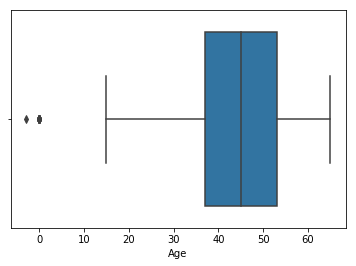

In [120]:
sns.boxplot(x='Age', data=demographic)
plt.show()

In [ ]:
#Deleting record with afe -3 and 0